<div style="background-color: #fefefe ;border: 5px solid #27548A;">
    <header style="; display:flex; padding: 10px 20px">
        <img src="Logo White Background.png" style="width: 200px ; height: 200px ; margin-right: 550px"/>
        <img src="https://ugc.production.linktr.ee/70ae7335-638e-46b4-baff-7e7700847a2f_IMG-20231018-WA0014-1-.jpeg?io=true&size=thumbnail-stack-v1_0" style="width: 200px ; height: 200px"/>
    </header>
    <div style=" padding: 20px ;  border-radius: 5px">
        <h2 style="color: #27548A; font-weight: bold; font-size: 35px; text-decoration: underline ; text-align: center">Hr Analysis DEPI Round 2 Project</h2>
        <div>
            <span style="color: #1E3E62; font-weight: bold; font-size: 28px">Analysis Flow</span>
            <ul>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Importing Libraries & Reading Files</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Data Inspection</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">Data Processing and Cleaning</li>
                <li style="color: #0B192C; font-weight: bold; font-size: 22px ; margin-left: 20px">EDA</li>
            </ul>
        </div> 
    </div>
</div>
<br>


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background-color: #6A42C2 ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">1- Getting Started</h2>
</div>

<br>
<div style="padding: 10px; border-bottom:5px solid #6A42C2; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">1.1 Importing Files</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table, Input, Output
import plotly.express as px
from IPython.display import display, HTML

<div style="padding: 10px; border-bottom:5px solid #6A42C2; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">1.2 Reading Sheets</h2>
</div>

In [2]:
ANALYSIS_SHEET_PATH = r"C:\Users\Lenovo\Desktop\HR_analysis(final_project_DEPI)\Excel\Final Excel Analysis.xlsx"
Analysis_Sheets = pd.ExcelFile(ANALYSIS_SHEET_PATH)

# Define the sheet names
sheets = Analysis_Sheets.sheet_names[1:10]
print(sheets)

['Fact_Performance', 'dimworklifebalance', 'dimSelfRating', 'dimManagerRating', 'dimrelationshipsatisfaction', 'dimjobsatisfaction', 'dimenvironmentsatisfaction', 'DimEducationLevel', 'DimEmployee']


In [3]:
# Create the DataFrames

fact_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[0])
employee_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[8])
rating_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[2])
sats_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[4])
edu_lvl_df = pd.read_excel(ANALYSIS_SHEET_PATH, sheet_name= sheets[7])

# ensuring the Data is Successfully uploaded
dataFrame_list = [fact_df, employee_df, rating_df, sats_df, edu_lvl_df]
for i in range(0 , 5):
    print(dataFrame_list[i])
    print("*"*20)

     PerformanceID EmployeeID ReviewDate  EnvironmentSatisfaction  \
0             PR01  79F7-78EC 2013-01-02                        5   
1             PR02  B61E-0F26 2013-01-03                        5   
2             PR03  F5E3-48BB 2013-01-03                        3   
3             PR04  0678-748A 2013-01-04                        5   
4             PR05  541F-3E19 2013-01-04                        5   
...            ...        ...        ...                      ...   
6703         PR995  4F28-CFAF 2016-03-14                        5   
6704         PR996  7C80-94E0 2016-03-14                        3   
6705         PR997  8233-2483 2016-03-14                        3   
6706         PR998  8A5B-3D6E 2016-03-15                        5   
6707         PR999  4500-37EB 2016-03-16                        4   

      JobSatisfaction  RelationshipSatisfaction  \
0                   4                         5   
1                   4                         4   
2                 


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background-color: #1278ba ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">2- Data Inspection</h2>
</div>

<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.1 Import "Performance Table" </h2>
</div>

In [4]:
fact_df.info()
fact_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6708 non-null   object        
 1   EmployeeID                       6708 non-null   object        
 2   ReviewDate                       6708 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6708 non-null   int64         
 4   JobSatisfaction                  6708 non-null   int64         
 5   RelationshipSatisfaction         6708 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6708 non-null   int64         
 7   TrainingOpportunitiesTaken       6708 non-null   int64         
 8   WorkLifeBalance                  6708 non-null   int64         
 9   SelfRating                       6708 non-null   int64         
 10  ManagerRating                    6708 non-null   int64      

,count,mean,min,25%,50%,75%,max,std
ReviewDate,6708,2019-04-14 00:30:54.740608512,2013-01-02 00:00:00,2017-05-20 18:00:00,2019-09-14 12:00:00,2021-05-31 06:00:00,2022-12-31 00:00:00,NaN
EnvironmentSatisfaction,6708.0,3.872689,1.0,3.0,4.0,5.0,5.0,0.940711
JobSatisfaction,6708.0,3.430382,1.0,2.0,3.0,4.0,5.0,1.152492
RelationshipSatisfaction,6708.0,3.427251,1.0,2.0,3.0,4.0,5.0,1.156818
TrainingOpportunitiesWithinYear,6708.0,2.013119,1.0,1.0,2.0,3.0,3.0,0.820278
TrainingOpportunitiesTaken,6708.0,1.016995,0.0,0.0,1.0,2.0,3.0,0.950078
WorkLifeBalance,6708.0,3.414431,1.0,2.0,3.0,4.0,5.0,1.143882
SelfRating,6708.0,3.984049,3.0,3.0,4.0,5.0,5.0,0.816493
ManagerRating,6708.0,3.473315,2.0,3.0,3.0,4.0,5.0,0.961788


In [5]:
fact_df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3


<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.2 Import "Employee Table"</h2>
</div>

In [6]:
employee_df.info()
employee_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1469 non-null   object        
 1   Full Name                1469 non-null   object        
 2   Gender                   1469 non-null   object        
 3   Age                      1469 non-null   int64         
 4   BusinessTravel           1469 non-null   object        
 5   Department               1469 non-null   object        
 6   DistanceFromHome         1469 non-null   int64         
 7   State                    1469 non-null   object        
 8   Ethnicity                1469 non-null   object        
 9   EducationLevelID         1469 non-null   int64         
 10  EducationField           1469 non-null   object        
 11  JobRole                  1469 non-null   object        
 12  MaritalStatus            1469 non-

,count,mean,min,25%,50%,75%,max,std
Age,1469.0,28.99047,18.0,23.0,26.0,34.0,51.0,7.995736
DistanceFromHome,1469.0,22.507828,1.0,12.0,22.0,33.0,45.0,12.81399
EducationLevelID,1469.0,2.912185,1.0,2.0,3.0,4.0,5.0,1.024121
Salary,1469.0,112815.815521,20387.0,43578.0,71198.0,141998.0,547204.0,103237.175445
StockOptionLevel,1469.0,0.794418,0.0,0.0,1.0,1.0,3.0,0.852115
HireDate,1469,2017-07-04 17:35:44.315861248,2012-01-03 00:00:00,2014-07-10 00:00:00,2017-08-31 00:00:00,2020-05-14 00:00:00,2022-12-31 00:00:00,NaN
YearsAtCompany,1469.0,4.56501,0.0,2.0,4.0,7.0,10.0,3.287852
YearsInMostRecentRole,1469.0,2.294078,0.0,0.0,1.0,4.0,10.0,2.539733
YearsSinceLastPromotion,1469.0,3.442478,0.0,1.0,3.0,6.0,10.0,2.945508
YearsWithCurrManager,1469.0,2.24098,0.0,0.0,1.0,4.0,10.0,2.505946


In [7]:
employee_df.head(10)

,EmployeeID,Full Name,Gender,Age,BusinessTravel,Department,DistanceFromHome,State,Ethnicity,EducationLevelID,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,79F7-78EC,Alessandra Storrock,Non-Binary,27,Some Travel,Sales,37,California,White,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,B61E-0F26,Care Heintze,Male,28,Frequent Traveller,Technology,3,New York,White,3,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,00A3-2445,Wyatt Ziehm,Male,30,Some Travel,Technology,6,California,Black or African American,2,...,Married,126238,0,No,2012-03-08,No,10,3,6,6
3,F5E3-48BB,Zenia Rattery,Female,25,Frequent Traveller,Human Resources,3,California,American Indian or Alaska Native,3,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
4,00B0-F199,Trueman Jirasek,Male,23,Some Travel,Sales,35,California,White,1,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
5,0678-748A,Maurits Farmery,Male,25,Some Travel,Sales,4,California,Native Hawaiian,2,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
6,00D4-DD53,Joyce Goor,Female,30,Frequent Traveller,Technology,44,California,Black or African American,1,...,Single,68508,0,Yes,2012-01-28,Yes,5,4,4,4
7,541F-3E19,Dot Aherne,Female,27,Some Travel,Technology,30,California,White,1,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1
8,00E4-3D60,Sherilyn Girke,Female,30,Frequent Traveller,Technology,37,California,White,1,...,Single,109778,0,No,2022-06-23,Yes,0,0,0,0
9,F93E-BDEF,Rodolfo Askem,Male,43,Some Travel,Technology,17,California,Black or African American,4,...,Single,130848,0,Yes,2014-02-09,No,8,8,8,8


<div style="padding: 10px; border-bottom:5px solid #1278ba; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">2.2 Dataset Dimensions "Education level table" , "Satisfaction and Rating Tables" </h2>
</div>

In [8]:
print("EducationLevel Table")
edu_lvl_df.info()

EducationLevel Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [9]:
print("Satisfaction Table")
sats_df.info()

Satisfaction Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RelSatisfactionID  5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [10]:
print("Rating Table")
rating_df.info()

Rating Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SelfRatingID  5 non-null      int64 
 1   RatingLevel   5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [11]:
edu_lvl_df.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [12]:
sats_df.head()

,RelSatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [13]:
rating_df.head()

,SelfRatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background: linear-gradient(to right , #16C47F , #16eaD1) ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">3- Data Cleaning</h2>
</div>

<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.1 Detecting missing values </h2>
</div>

In [14]:
for i in dataFrame_list:
    print(i.isnull().sum())
    print("**"*20)

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64
****************************************
EmployeeID                 0
Full Name                  0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
State                      0
Ethnicity                  0
EducationLevelID           0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany   

<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.2 Detecting Duplicate Data </h2>
</div>

In [15]:
for i in dataFrame_list:
    print(f"Count of Duplications: {i.duplicated().sum()}")
    print("**"*20)

Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************
Count of Duplications: 0
****************************************


<div style="padding: 10px; border-bottom:5px solid #16C47F; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; background-color: #f0f0f0">3.3 Detecting Outliers</h2>
</div>

<Axes: >

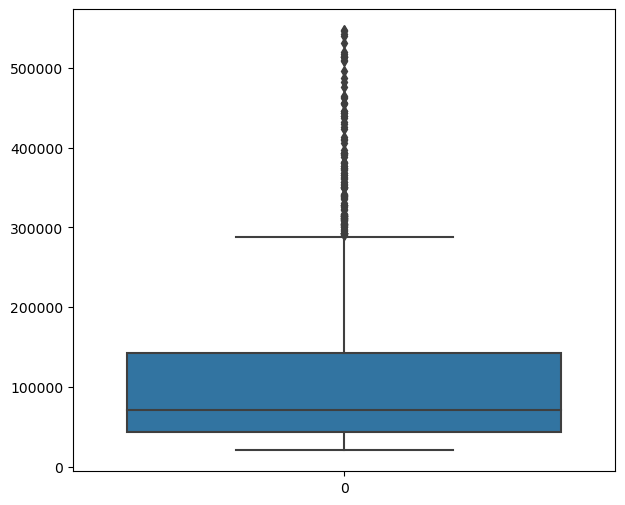

In [16]:
plt.subplots(figsize=(7, 6))
sns.boxplot( data=employee_df['Salary'])

In [17]:
# Building the IQR, Upper & Lower Bound Functions

def IQR(first_quartile,third_quartile):
    result = third_quartile - first_quartile
    return result
    
def upper_bound(IQR , Third_quartile):
    return Third_quartile + 1.5  * IQR
     
    
def lower_bound(IQR , First_quartile):
    return  First_quartile - 1.5 * IQR

In [18]:
outlier_indices = []


for role in employee_df['JobRole'].unique():
    print(role)
    role_salaries = employee_df[employee_df['JobRole'] == role]['Salary']
    print(f"Counts: {employee_df[employee_df['JobRole'] == role].value_counts().sum()}")
    Q1 = role_salaries.quantile(0.25)
    Q3 = role_salaries.quantile(0.75)
    iqr = IQR(Q1, Q3)

    upper_fence = upper_bound(iqr, Q3)
    lower_fence = lower_bound(iqr, Q1)

    print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {iqr}\nupper fence: {upper_fence}\nlower fence: {lower_fence}")
    
    
    outliers = employee_df[
        (employee_df['JobRole'] == role) & 
        ((employee_df['Salary'] < lower_fence) | (employee_df['Salary'] > upper_fence))
    ].index

    outlier_indices.extend(outliers)
    
    print(outliers)
    print(" ")
    print("**"*20)
    print(" ")

print(len(outlier_indices))


Sales Executive
Counts: 326
Q1: 65253.5
Q3: 148421.0
IQR: 83167.5
upper fence: 273172.25
lower fence: -59497.75
Index([55, 101, 285, 327, 449, 478, 699, 1074, 1173], dtype='int64')
 
****************************************
 
Software Engineer
Counts: 294
Q1: 30749.5
Q3: 60771.75
IQR: 30022.25
upper fence: 105805.125
lower fence: -14283.875
Index([46, 169, 224, 229, 310, 331, 367, 425, 645, 735, 1206, 1312, 1348], dtype='int64')
 
****************************************
 
Machine Learning Engineer
Counts: 146
Q1: 69932.5
Q3: 194454.0
IQR: 124521.5
upper fence: 381236.25
lower fence: -116849.75
Index([], dtype='int64')
 
****************************************
 
Recruiter
Counts: 24
Q1: 26099.0
Q3: 48956.5
IQR: 22857.5
upper fence: 83242.75
lower fence: -8187.25
Index([], dtype='int64')
 
****************************************
 
Data Scientist
Counts: 261
Q1: 32456.0
Q3: 65416.0
IQR: 32960.0
upper fence: 114856.0
lower fence: -16984.0
Index([58, 204, 289, 323, 359, 361, 454, 514, 10

In [19]:
import random as rd
employee_df.loc[rd.choice(outlier_indices)]

EmployeeID                                 9811-F345
Full Name                           Wells Mulholland
Gender                                          Male
Age                                               42
BusinessTravel                           Some Travel
Department                                Technology
DistanceFromHome                                  40
State                                     California
Ethnicity                  Black or African American
EducationLevelID                                   4
EducationField                      Computer Science
JobRole                               Data Scientist
MaritalStatus                               Divorced
Salary                                        142075
StockOptionLevel                                   1
OverTime                                          No
HireDate                         2013-08-15 00:00:00
Attrition                                         No
YearsAtCompany                                

In [20]:
# Update the Dataframes by excluding the outliers
removed_ids = employee_df.loc[outlier_indices, "EmployeeID"]
employee_df = employee_df[~employee_df["EmployeeID"].isin(removed_ids)]
fact_df = fact_df[~fact_df["EmployeeID"].isin(removed_ids)]

In [21]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429 entries, 0 to 1468
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1429 non-null   object        
 1   Full Name                1429 non-null   object        
 2   Gender                   1429 non-null   object        
 3   Age                      1429 non-null   int64         
 4   BusinessTravel           1429 non-null   object        
 5   Department               1429 non-null   object        
 6   DistanceFromHome         1429 non-null   int64         
 7   State                    1429 non-null   object        
 8   Ethnicity                1429 non-null   object        
 9   EducationLevelID         1429 non-null   int64         
 10  EducationField           1429 non-null   object        
 11  JobRole                  1429 non-null   object        
 12  MaritalStatus            1429 non-null 

In [22]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6486 entries, 0 to 6707
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6486 non-null   object        
 1   EmployeeID                       6486 non-null   object        
 2   ReviewDate                       6486 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6486 non-null   int64         
 4   JobSatisfaction                  6486 non-null   int64         
 5   RelationshipSatisfaction         6486 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6486 non-null   int64         
 7   TrainingOpportunitiesTaken       6486 non-null   int64         
 8   WorkLifeBalance                  6486 non-null   int64         
 9   SelfRating                       6486 non-null   int64         
 10  ManagerRating                    6486 non-null   int64         
d

<hr style="border: 5px solid #4f4f4f;">

<div style="padding: 20px;  background: linear-gradient(to right ,#3A59D1 , #1A2CCD) ;border-radius: 5px;">
    <h2 style="color: black;  color: #fff">4- EDA</h2>
</div>

<div>
    <h2 style="font-family: 'Roboto', monospace; color: #4574cc">Project Overview</h2>
    <p>This project involves the analysis of employee-related data collected over time, which includes various satisfaction ratings, training activity, and self/manager assessments. The goal is to uncover trends and insights that can inform HR strategies related to employee engagement, development, and retention.</p>
    <h2 style="font-family: 'Roboto', monospace; color: #4574cc">Patterns to analyze in this project</h2>
    <ul>
        <li>Trends in Ratings</li>
        <li>Attrition Patterns</li>
    </ul>    
</div>


<h2 style="font-family: 'Roboto', monospace; text-align: center; margin-bottom: 10px; color: #4574ee">Merging and Grouping DataFrames<h2>
<hr style="border 2px solid #adadadbb">

In [23]:
left_merged_df = pd.merge(employee_df , fact_df , on="EmployeeID" , how="left")

# for i in merged_df.columns:
#     merged_df.rename(columns={i : i.strip()})
# print("done")

left_merged_df.isnull().sum()
left_merged_df.info()
left_merged_df['ReviewDate'] = pd.to_datetime(left_merged_df['ReviewDate'])
left_merged_df['HireDate'] = pd.to_datetime(left_merged_df['HireDate'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6672 non-null   object        
 1   Full Name                        6672 non-null   object        
 2   Gender                           6672 non-null   object        
 3   Age                              6672 non-null   int64         
 4   BusinessTravel                   6672 non-null   object        
 5   Department                       6672 non-null   object        
 6   DistanceFromHome                 6672 non-null   int64         
 7   State                            6672 non-null   object        
 8   Ethnicity                        6672 non-null   object        
 9   EducationLevelID                 6672 non-null   int64         
 10  EducationField                   6672 non-null   object     

<h2 style="font-family: 'Roboto', monospace; text-align: center; margin-bottom: -10px; color: #4574ee">Performance Evaluation Metrics<h2>
    <h3 style="font-family: 'Roboto', monospace; text-align: center; color: #00f">1- Non Evaluated Employees</h3>
<hr style="border 2px solid #adadadbb">

In [24]:
grouped = left_merged_df[left_merged_df["PerformanceID"].notna()].groupby("Full Name").agg({
    "PerformanceID": ['count']
})
average_evaluations = grouped.mean()

non_evaluated_employees = left_merged_df[left_merged_df["PerformanceID"].isna()]
non_evaluated_employees

,EmployeeID,Full Name,Gender,Age,BusinessTravel,Department,DistanceFromHome,State,Ethnicity,EducationLevelID,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
6486,001A-8F88,Christy Jumel,Male,22,Some Travel,Technology,40,California,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6487,018B-DF1E,Otha Sopper,Female,19,Some Travel,Sales,1,California,White,1,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6488,0375-2F04,Lani Raddenbury,Female,19,No Travel,Sales,38,illinois,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6489,03D5-622D,Aurora Whate,Female,21,No Travel,Sales,43,California,White,1,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6490,04D3-B8D3,Ann Sivorn,Female,24,Frequent Traveller,Technology,23,New York,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,F9D2-5579,Nancie Storck,Female,21,Frequent Traveller,Technology,17,California,White,2,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6668,FBAF-649F,Mathilda Franchi,Female,19,Some Travel,Technology,33,New York,White,3,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6669,FC2A-4F21,Torre Blazynski,Male,32,Some Travel,Sales,14,California,White,3,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6670,FD1A-92C2,Belvia Dockrell,Female,35,Some Travel,Sales,21,California,White,4,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
round(average_evaluations.sum() , 2)

5.22

In [26]:
non_evaluated_employees.describe()

,Age,DistanceFromHome,EducationLevelID,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,186.000000,186.000000,186.000000,186.000000,186.000000,186,186.000000,186.000000,186.000000,186.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24.327957,23.322581,3.080645,101808.021505,0.844086,2022-04-05 14:19:21.290322688,0.322581,0.172043,0.258065,0.161290,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,1.000000,1.000000,20418.000000,0.000000,2021-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.000000,12.000000,3.000000,36766.500000,0.000000,2021-11-27 18:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,21.000000,23.000000,3.000000,59040.500000,1.000000,2022-03-24 00:00:00,0.000000,0.000000,0.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,27.750000,35.000000,4.000000,124277.500000,1.000000,2022-08-23 00:00:00,1.000000,0.000000,1.000000,0.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,50.000000,45.000000,5.000000,509261.000000,3.000000,2022-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.607605,12.888848,1.002134,100665.618128,0.877584,NaN,0.468725,0.378436,0.438751,0.368791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
employee_df_numeric=employee_df.select_dtypes(exclude='object')
corr_employee_df = employee_df_numeric.corr()
print(corr_employee_df)

                              Age  DistanceFromHome  EducationLevelID  \
Age                      1.000000          0.021398         -0.015780   
DistanceFromHome         0.021398          1.000000          0.004178   
EducationLevelID        -0.015780          0.004178          1.000000   
Salary                   0.532259          0.037311          0.091944   
StockOptionLevel         0.010436          0.020070          0.022866   
HireDate                -0.527064          0.037382          0.077177   
YearsAtCompany           0.549727         -0.032155         -0.058348   
YearsInMostRecentRole    0.370589         -0.030923         -0.046913   
YearsSinceLastPromotion  0.468911         -0.045626         -0.065541   
YearsWithCurrManager     0.407587         -0.003404         -0.067164   

                           Salary  StockOptionLevel  HireDate  YearsAtCompany  \
Age                      0.532259          0.010436 -0.527064        0.549727   
DistanceFromHome         0.037311 

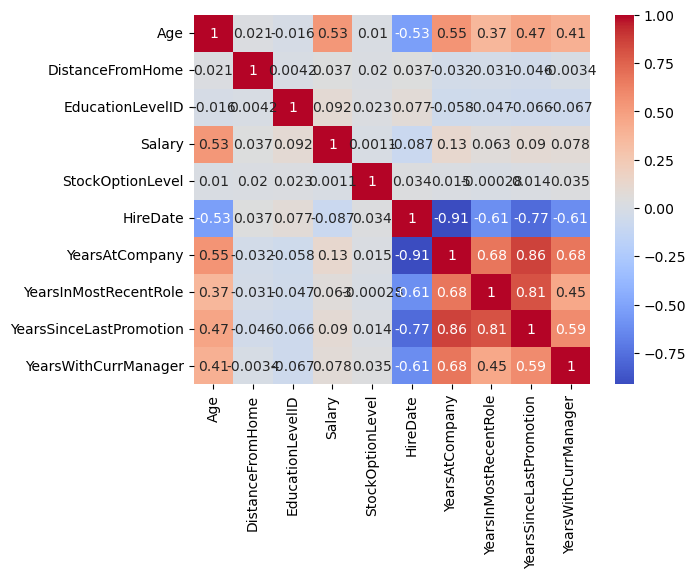

In [28]:
sns.heatmap(corr_employee_df, annot=True, cmap='coolwarm')
plt.show()

In [29]:
fact_df_numeric=fact_df.select_dtypes(exclude='object')
corr_fact_df = fact_df_numeric.corr()
print(corr_fact_df)

                                 ReviewDate  EnvironmentSatisfaction  \
ReviewDate                         1.000000                -0.093261   
EnvironmentSatisfaction           -0.093261                 1.000000   
JobSatisfaction                   -0.057111                 0.099134   
RelationshipSatisfaction          -0.043789                 0.096060   
TrainingOpportunitiesWithinYear    0.003859                -0.006329   
TrainingOpportunitiesTaken        -0.019791                -0.013177   
WorkLifeBalance                   -0.026849                 0.097650   
SelfRating                        -0.030688                -0.001644   
ManagerRating                     -0.020531                -0.008168   

                                 JobSatisfaction  RelationshipSatisfaction  \
ReviewDate                             -0.057111                 -0.043789   
EnvironmentSatisfaction                 0.099134                  0.096060   
JobSatisfaction                         1.000

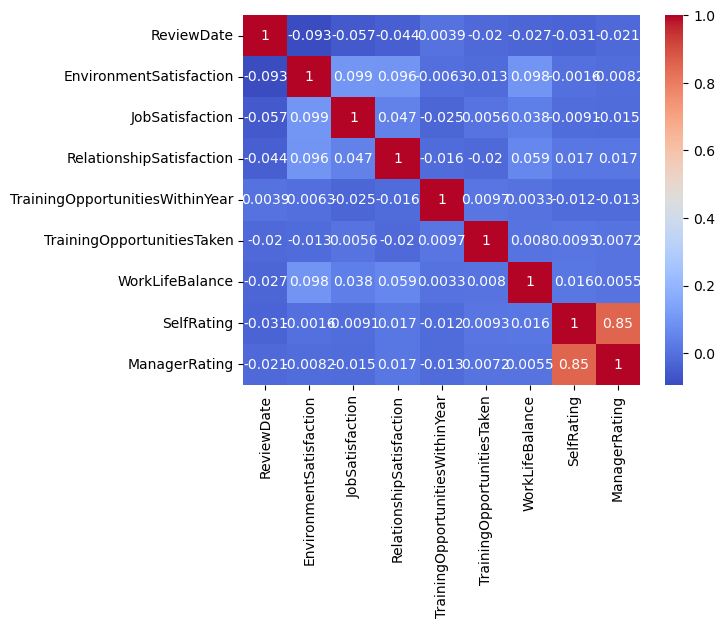

In [30]:
sns.heatmap(corr_fact_df, annot=True, cmap='coolwarm')
plt.show()

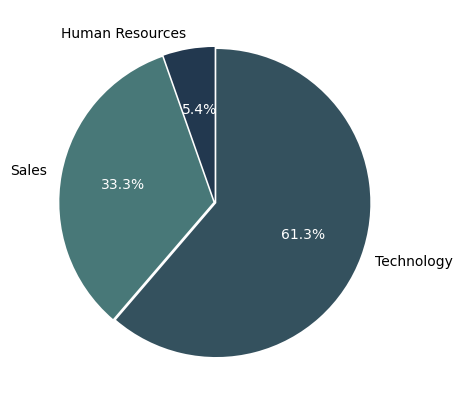

In [31]:
# Non Evaluated Employees Analysis
job_roles = non_evaluated_employees.groupby("Department")
A1 = job_roles.count()

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    x=A1["EmployeeID"],
    labels=A1.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.01, 0.01, 0.01],
    colors=['#22384F', '#487878', '#34515E']
)

# Make percentage numbers (autotexts) white
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

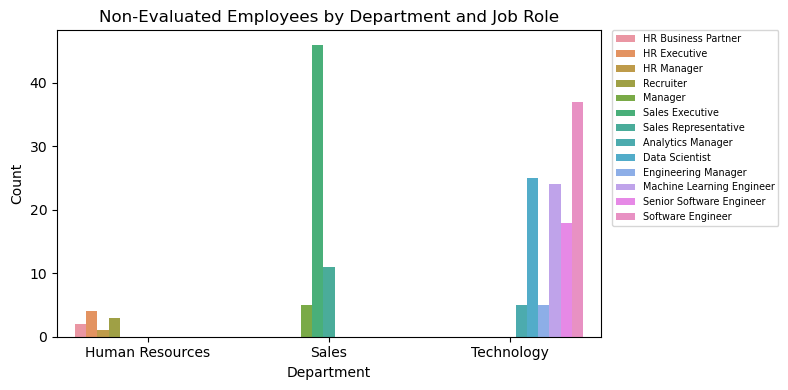

In [32]:
counts = non_evaluated_employees.groupby(['Department', 'JobRole']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))  # widened the figure a bit
sns.barplot(data=counts, x='Department', y='Count', hue='JobRole')
plt.title("Non-Evaluated Employees by Department and Job Role")
plt.xticks(rotation=0)

# Move legend completely outside the plot (right side)
plt.legend(
    title='',
    fontsize="x-small",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

 <h3 style="font-family: 'Roboto', monospace; text-align: center; color: #00f">2- Evaluated Employees</h3>

In [33]:
merged_df = pd.merge(employee_df , fact_df  , how="inner")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486 entries, 0 to 6485
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6486 non-null   object        
 1   Full Name                        6486 non-null   object        
 2   Gender                           6486 non-null   object        
 3   Age                              6486 non-null   int64         
 4   BusinessTravel                   6486 non-null   object        
 5   Department                       6486 non-null   object        
 6   DistanceFromHome                 6486 non-null   int64         
 7   State                            6486 non-null   object        
 8   Ethnicity                        6486 non-null   object        
 9   EducationLevelID                 6486 non-null   int64         
 10  EducationField                   6486 non-null   object     

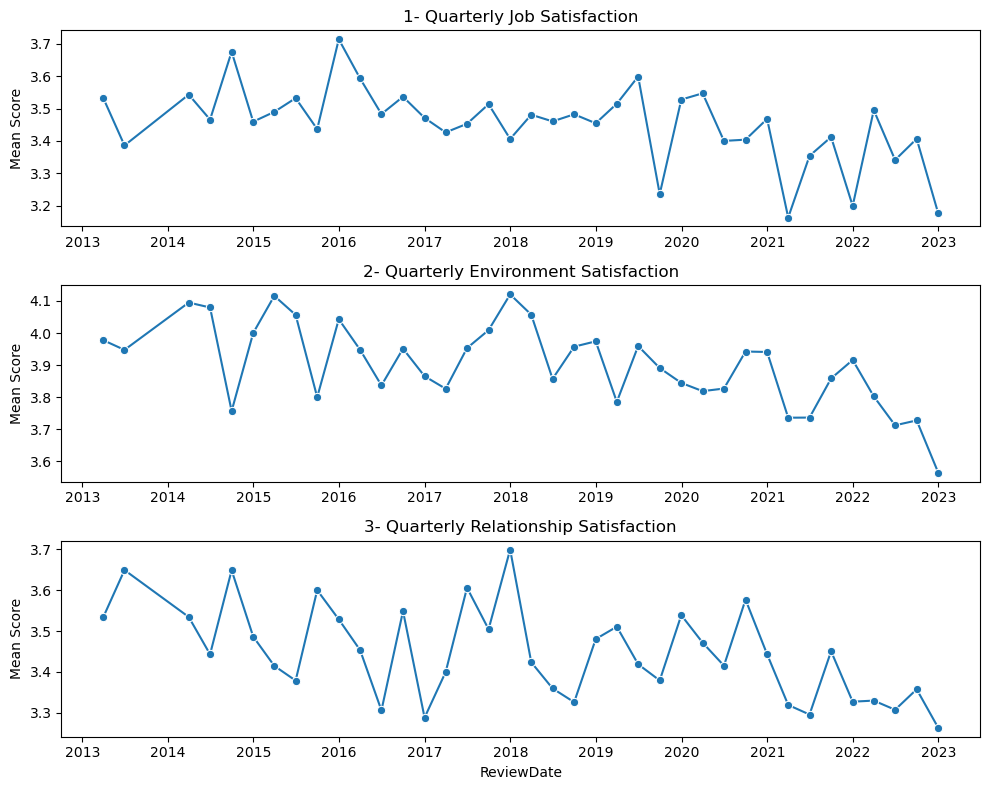

In [43]:
import matplotlib.dates as mdates
df = merged_df.copy()
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df = df.set_index("ReviewDate")


quarterly = df[["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]].resample("Q").mean().reset_index()


fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='JobSatisfaction',
    marker='o',
    ax=axes[0]
)
axes[0].set_title("1- Quarterly Job Satisfaction")

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='EnvironmentSatisfaction',
    marker='o',
    ax=axes[1]
)
axes[1].set_title("2- Quarterly Environment Satisfaction")

sns.lineplot(
    data=quarterly,
    x='ReviewDate',
    y='RelationshipSatisfaction',
    marker='o',
    ax=axes[2]
)
axes[2].set_title("3- Quarterly Relationship Satisfaction")

# Final tweaks
for ax in axes:
    ax.set_ylabel("Mean Score")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis as years
    ax.tick_params(labelrotation=0, labelbottom=True)  # Keep labels horizontal (or set to 45 if preferred)

fig.tight_layout()
plt.show()

<div style="padding: 10px; border-bottom:5px solid #3A59D1; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; text-align: center ">1- Trends in Ratings</h2>
</div>

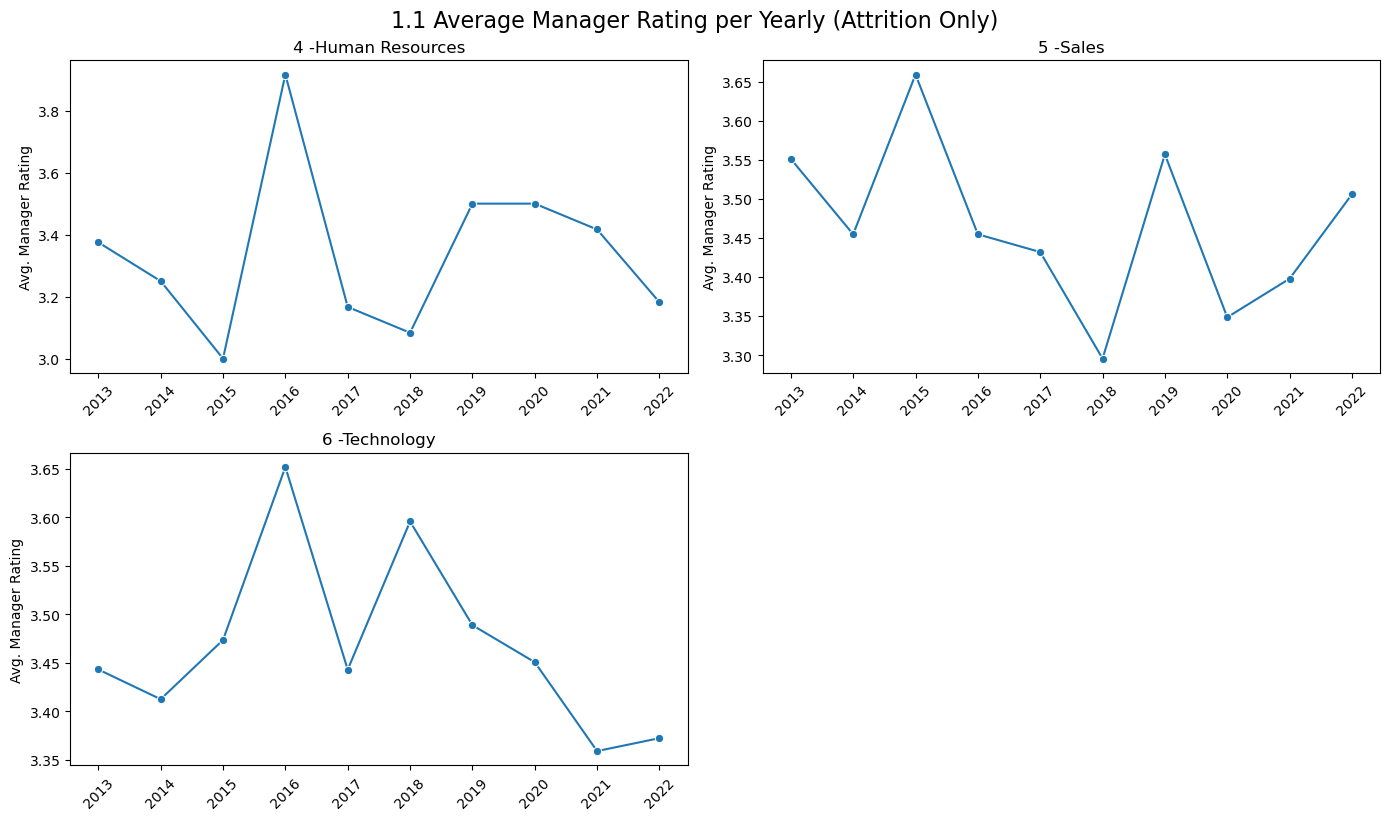

In [44]:
merged_df["ReviewDate"] = pd.to_datetime(merged_df["ReviewDate"])

# Filter for attrition cases
attrition_df = merged_df[merged_df["Attrition"] == "Yes"].copy()

# Create Quarter column
attrition_df["Yearly"] = attrition_df["ReviewDate"].dt.to_period("Y")

# Group by JobRole and Quarter
grouped = (
    attrition_df
    .groupby(["Department", "Yearly"])["ManagerRating"]
    .mean()
    .reset_index()
    .rename(columns={"ManagerRating": "AverageManagerRating"})
)
grouped["Yearly"] = grouped["Yearly"].astype(str)

# Get unique job roles
Departments = grouped["Department"].unique()
n_Departments = len(Departments)

# Plot layout setup
n_cols = 2
n_rows = (n_Departments + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=True)
axes = axes.flatten()

# Plot each job role in its own subplot
for i, role in enumerate(Departments):
    role_data = grouped[grouped["Department"] == role]
    sns.lineplot(data=role_data, x="Yearly", y="AverageManagerRating", marker='o', ax=axes[i])
    axes[i].set_title(f"{i + 4} -{role}")
    axes[i].tick_params(axis='x', rotation=45, labelbottom=True)
    axes[i].set_ylabel("Avg. Manager Rating")
    axes[i].set_xlabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("1.1 Average Manager Rating per Yearly (Attrition Only)", fontsize=16, y=1.02)
plt.show()

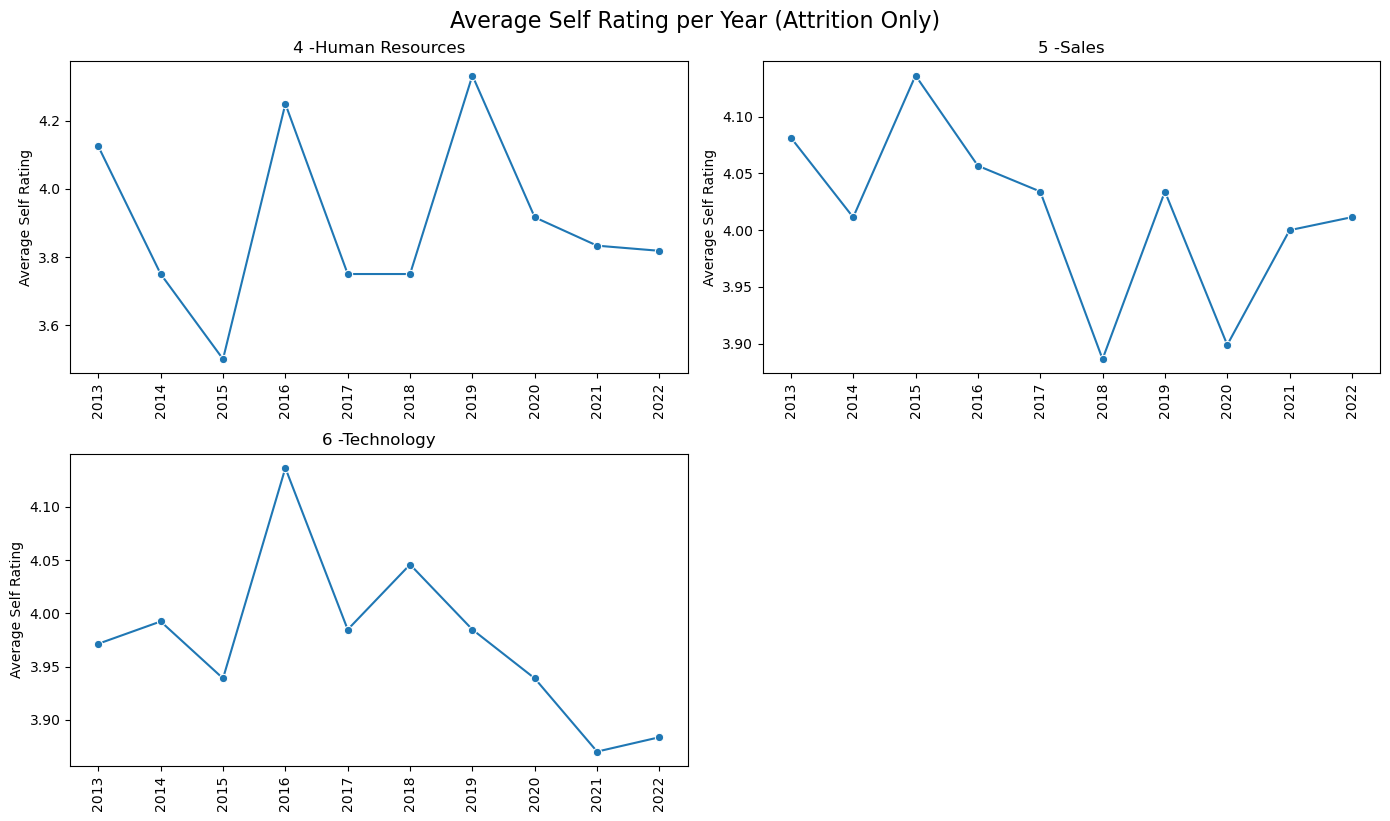

In [45]:
merged_df["ReviewDate"] = pd.to_datetime(merged_df["ReviewDate"])

# Filter for attrition cases
attrition_df = merged_df[merged_df["Attrition"] == "Yes"].copy()

# Create Quarter column
attrition_df["Yearly"] = attrition_df["ReviewDate"].dt.to_period("Y")

# Group by JobRole and Quarter
grouped = (
    attrition_df
    .groupby(["Department", "Yearly"])["SelfRating"]
    .mean()
    .reset_index()
    .rename(columns={"SelfRating": "AverageSelfRating"})
)
grouped["Yearly"] = grouped["Yearly"].astype(str)

# Get unique job roles
Departments = grouped["Department"].unique()
n_Departments = len(Departments)

# Plot layout setup
n_cols = 2
n_rows = (n_Departments + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharex=True)
axes = axes.flatten()

# Plot each job role in its own subplot
for i, role in enumerate(Departments):
    role_data = grouped[grouped["Department"] == role]
    sns.lineplot(data=role_data, x="Yearly", y="AverageSelfRating", marker='o', ax=axes[i])
    axes[i].set_title(f"{i + 4} -{role}")
    axes[i].tick_params(axis='x', rotation=90, labelbottom=True)
    axes[i].set_ylabel("Average Self Rating")
    axes[i].set_xlabel("")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Average Self Rating per Year (Attrition Only)", fontsize=16, y=1.02)
plt.show()

Text(0.5, 0, 'Rating')

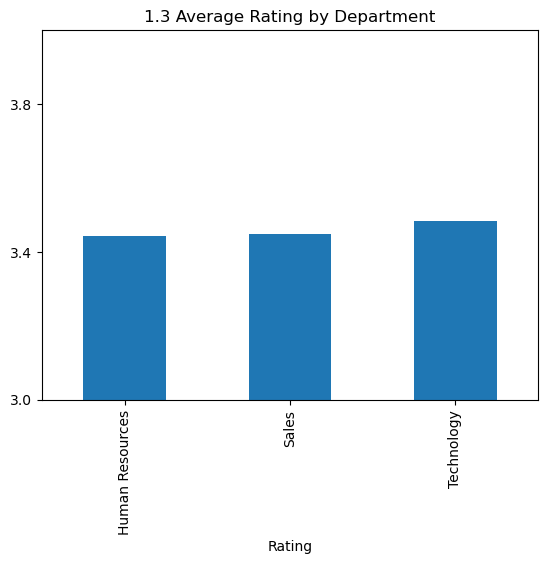

In [46]:
merged_df.groupby('Department')['ManagerRating'].mean().sort_values().plot(kind='bar')
plt.title('1.3 Average Rating by Department')
plt.ylim(3.2, 4)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

Text(0.5, 1.0, 'Average Manger Rating by Job Role')

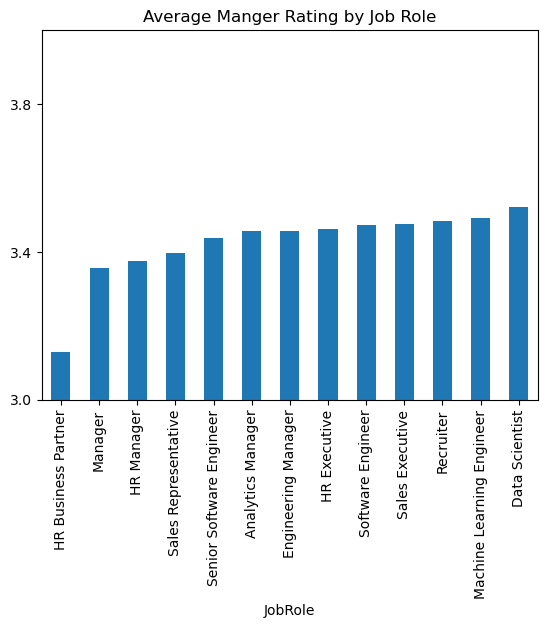

In [47]:
merged_df.groupby('JobRole')['ManagerRating'].mean().sort_values().plot(kind='bar')
plt.ylim(3, 4)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4, 0.4))  # Set steps of 0.1
plt.title('Average Manger Rating by Job Role')

Text(0.5, 0, 'Rating')

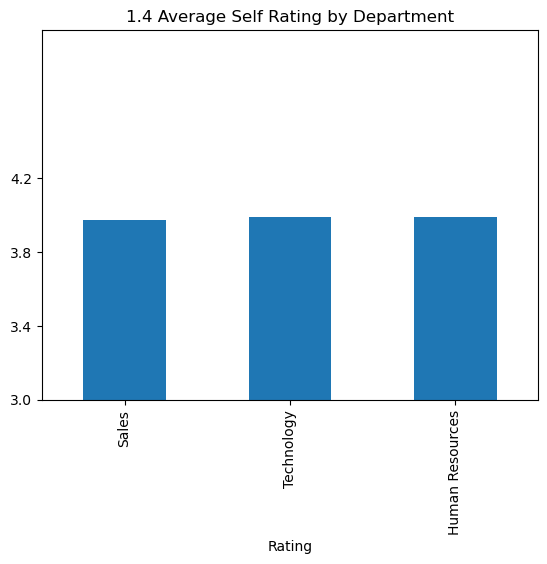

In [48]:
merged_df.groupby('Department')['SelfRating'].mean().sort_values().plot(kind='bar')
plt.title('1.4 Average Self Rating by Department')
plt.ylim(3.2, 5)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4.5, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

Text(0.5, 0, 'Rating')

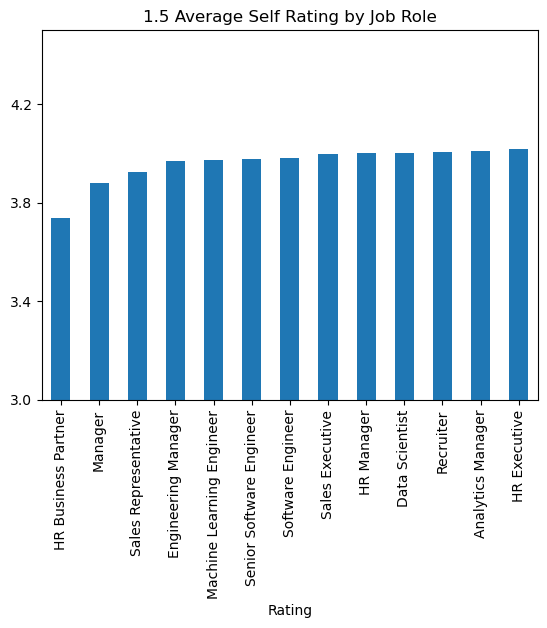

In [49]:
merged_df.groupby('JobRole')['SelfRating'].mean().sort_values().plot(kind='bar')
plt.title('1.5 Average Self Rating by Job Role')
plt.ylim(3.2, 4.5)  # Limit y-axis from 3 to 4
plt.yticks(np.arange(3, 4.5, 0.4))  # Set steps of 0.1
plt.xlabel('Rating')

<hr>
<div style="font-family: Arial, sans-serif; line-height: 1.6 ;">
    <h2 style="font-family: 'Roboto', sans-serif; font-size: 28px; color: #006A71;"> Rating Trends Insights</h2>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Uniform Evaluation Culture:</h3>
    <p style="margin-left: 80px;">The narrow rating range implies that the organization might have established consistent guidelines for performance evaluation. This can be beneficial for fairness and transparency.</p>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Limited Differentiation:</h3>
    <p style="margin-left: 80px;">The low variation may indicate rating compression, where scores cluster around the average. This could hinder the ability to clearly distinguish high performers from average ones.</p>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> Potential Rater Bias:</h3>
    <p style="margin-left: 80px;">The trend might be influenced by leniency bias, where managers avoid giving low ratings even when warranted, possibly to maintain harmony or avoid conflict.</p>
    <h2 style="font-family: 'Roboto', sans-serif; font-size: 28px; color: #006A71;">Recommendations</h2>
    <h3 style="font-family: 'Roboto', sans-serif; font-size: 20px; color: #B03052; margin-left: 40px"> HR Actionable Step:</h3>
    <p style="margin-left: 80px;">Introduce calibration workshops or manager training sessions to ensure ratings reflect actual performance and align with organizational goals.</p>
    
</div>




<div style="padding: 10px; border-bottom:5px solid #3A59D1; background-color: #f0f0f0 ;border-radius: 5px">
    <h2 style="color: black; text-align: center ">2- Attrition Patterns</h2>
</div>

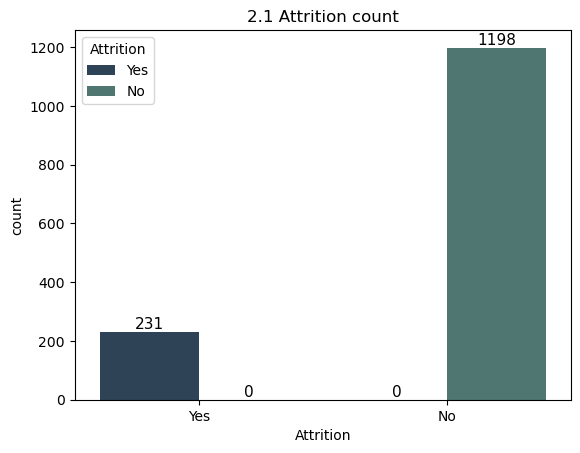

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#27445D', '#497D74']

# Create the countplot using hue
Attrition_Count = sns.countplot(data=employee_df, x="Attrition", hue="Attrition", palette=colors)

# Annotate the bars
for p in Attrition_Count.patches:
    height = p.get_height()
    Attrition_Count.annotate(f'{height:.0f}',
                             (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='bottom',
                             fontsize=11)

# Set title
plt.title("2.1 Attrition count")
plt.show()


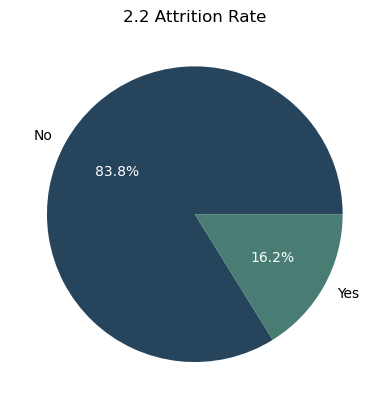

In [62]:
# Calculate attrition counts
attrition_counts = employee_df['Attrition'].value_counts()

# Create pie chart
wedges, texts, autotexts = plt.pie(
    attrition_counts,
    labels=attrition_counts.index,
    autopct='%1.1f%%',
    colors=['#27445D', '#497D74']
)

for autotext in autotexts:
    autotext.set_color('white')

# Set the title
plt.title('2.2 Attrition Rate')

# Show the plot
plt.show()


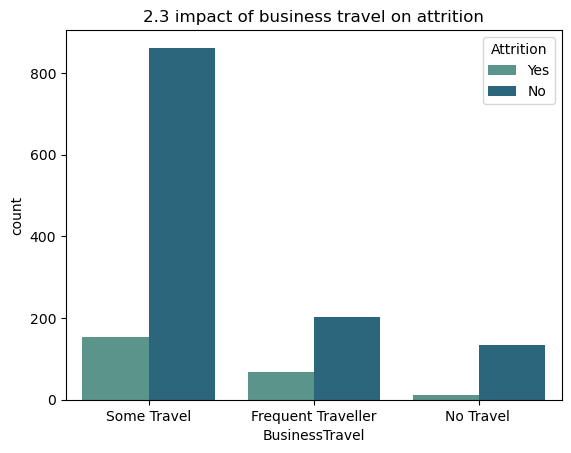

In [63]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.BusinessTravel,palette="crest")
plt.title("2.3 impact of business travel on attrition")
plt.show()

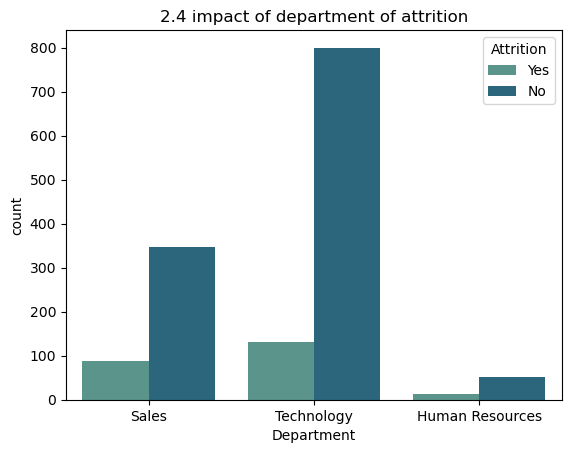

In [64]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.Department,palette="crest")
plt.title("2.4 impact of department of attrition")
plt.show()

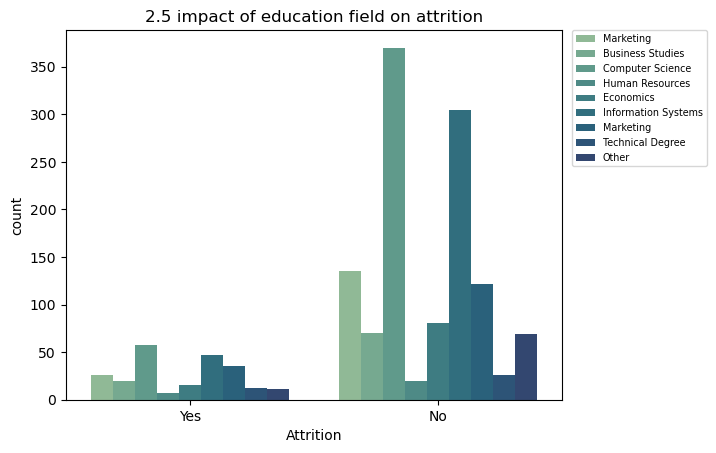

In [65]:
sns.countplot(x=employee_df.Attrition , hue=employee_df.EducationField, palette="crest")
plt.title("2.5 impact of education field on attrition")
plt.legend(
    title='',
    fontsize="x-small",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

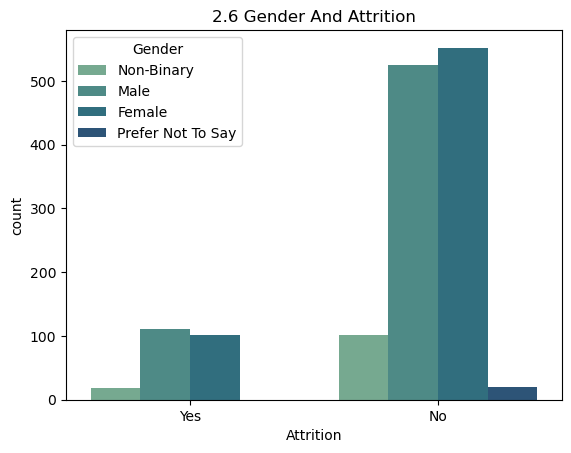

In [66]:
sns.countplot(x=employee_df.Attrition , hue=employee_df.Gender, palette="crest")
plt.title("2.6 Gender And Attrition")
plt.show()

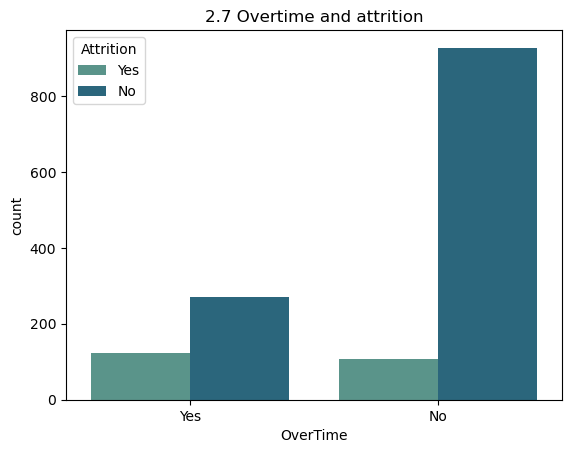

In [67]:
sns.countplot(hue=employee_df.Attrition , x=employee_df.OverTime, palette="crest")
plt.title("2.7 Overtime and attrition")
plt.show()

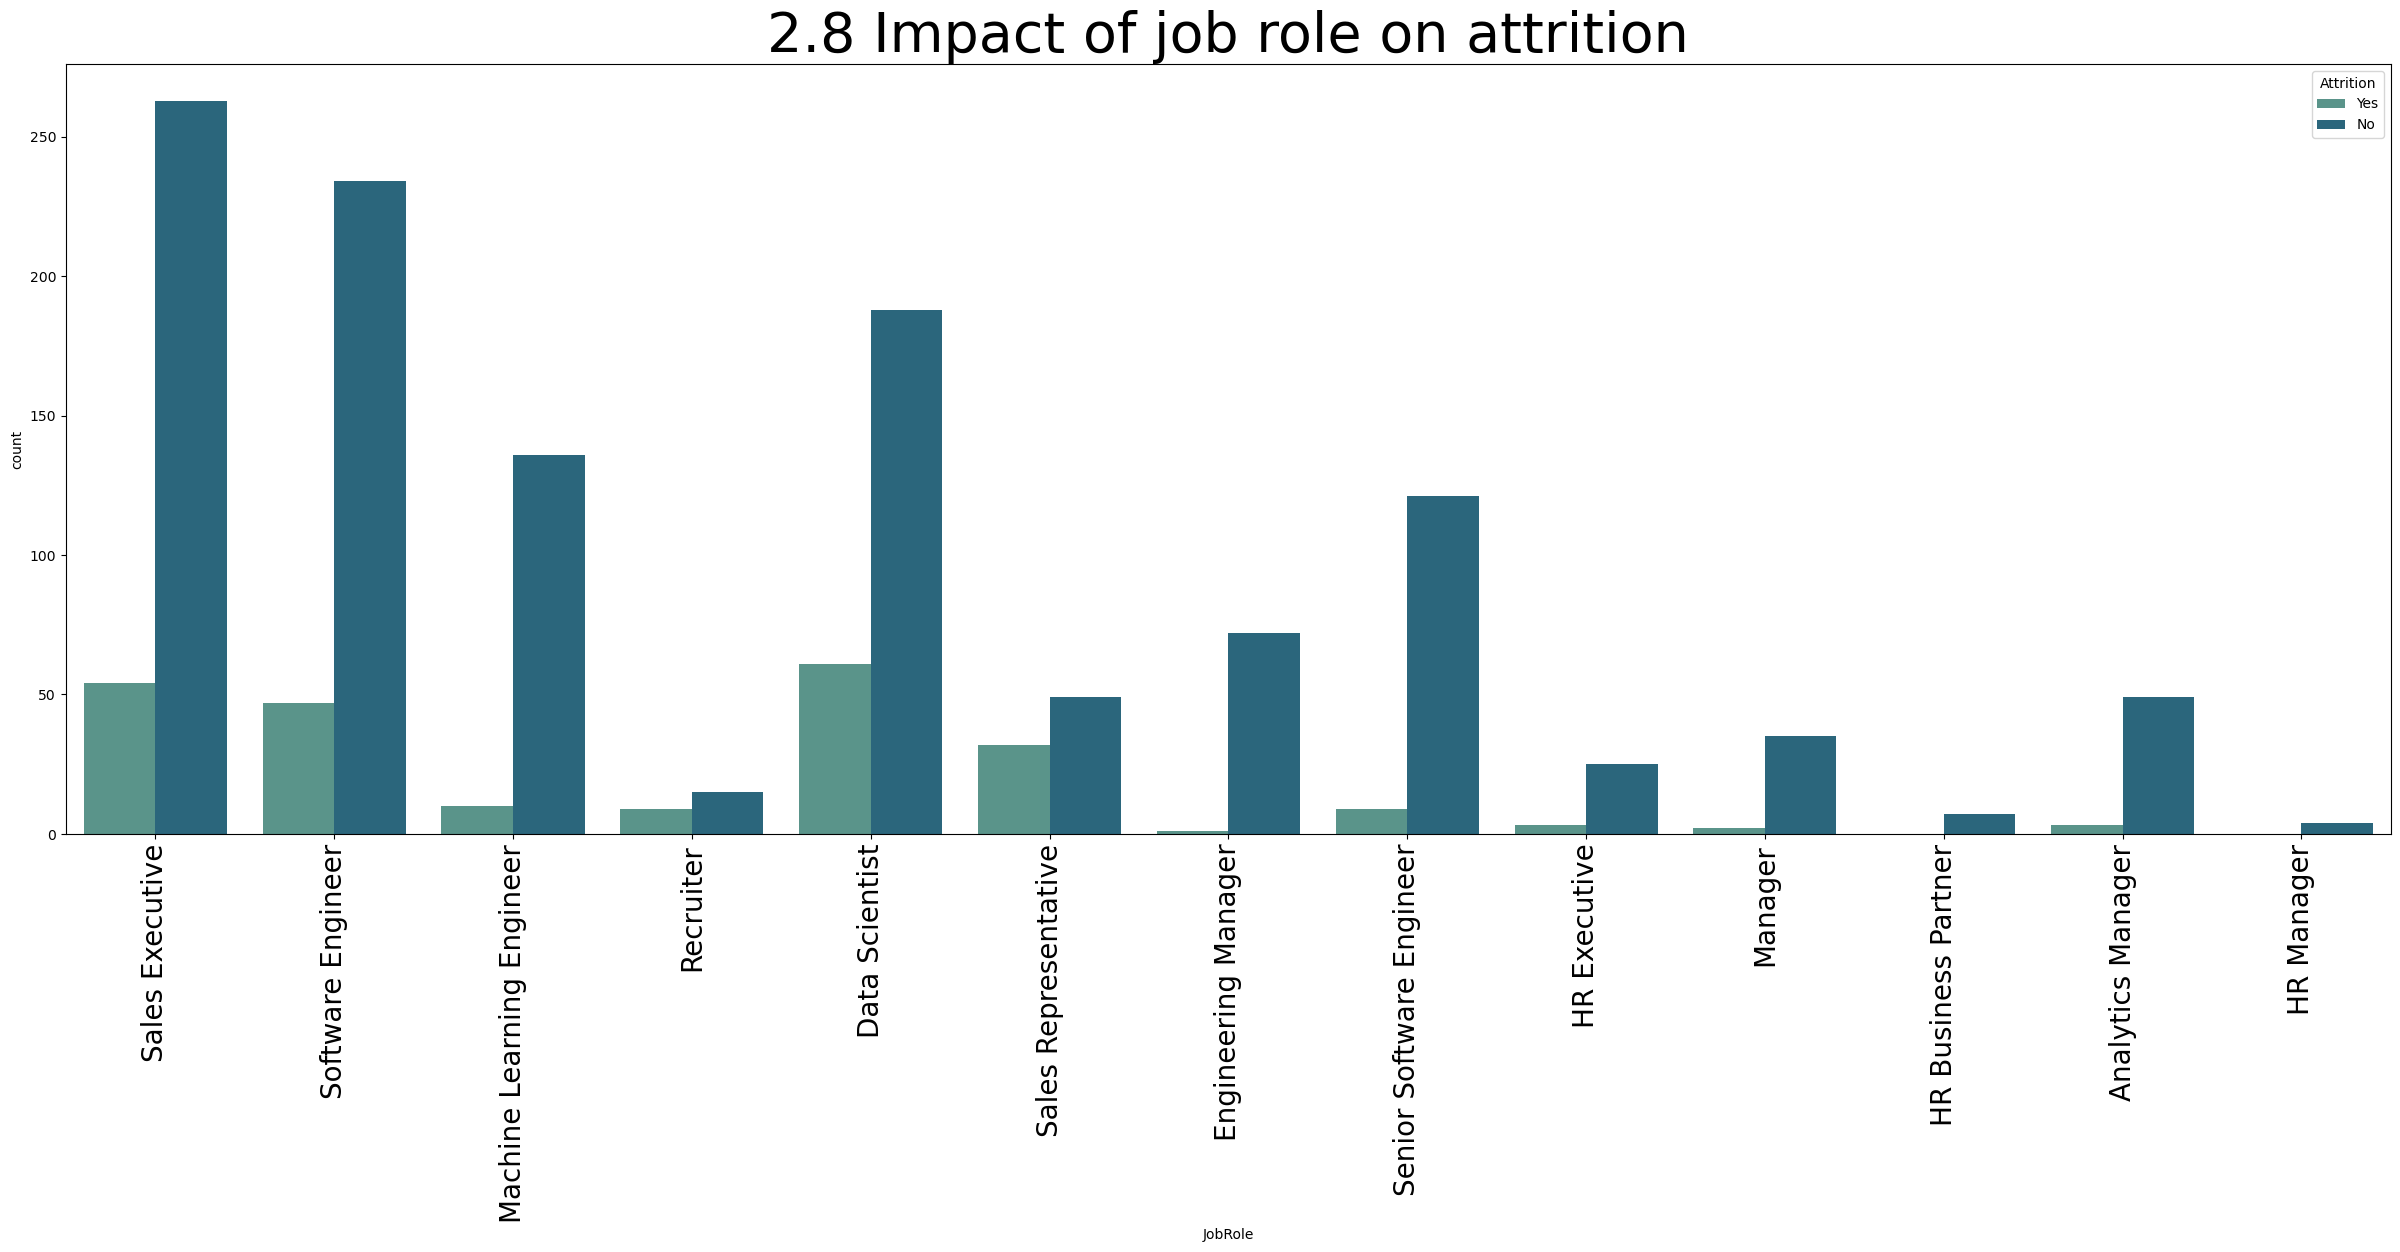

In [68]:
plt.figure(figsize=(30,10))
sns.countplot(hue=employee_df.Attrition , x=employee_df.JobRole, palette="crest")
plt.title("2.8 Impact of job role on attrition" , fontsize=40)
plt.xticks(fontsize=20 , rotation=90)
plt.show()

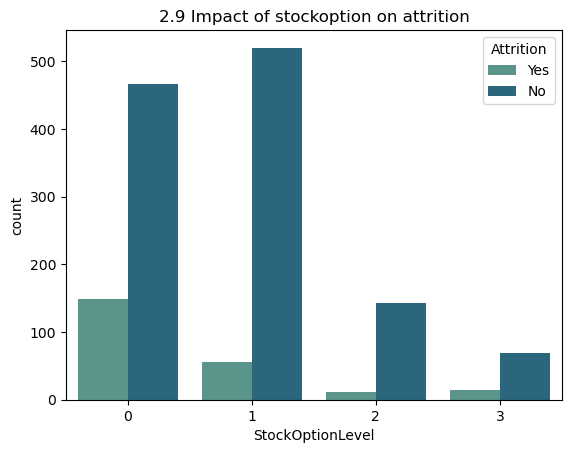

In [69]:
sns.countplot(x=employee_df.StockOptionLevel, hue=employee_df.Attrition , palette="crest")
plt.title("2.9 Impact of stockoption on attrition")
plt.show()

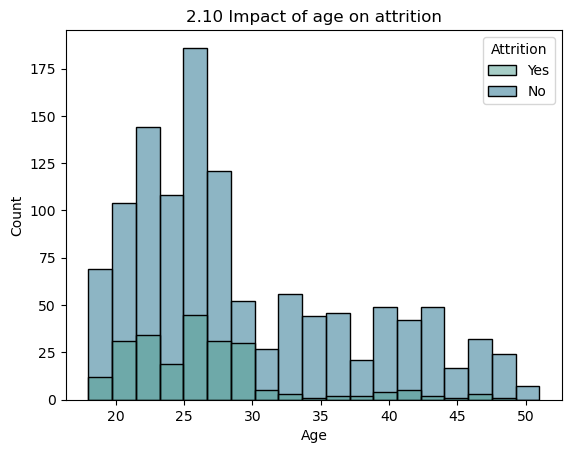

In [70]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.Age, palette="crest")
plt.title("2.10 Impact of age on attrition")
plt.show()

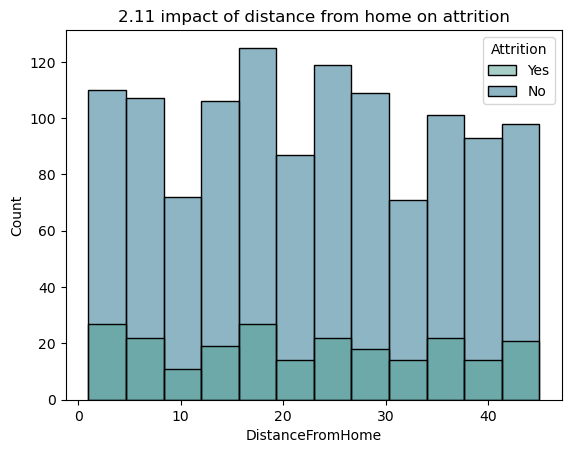

In [71]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.DistanceFromHome, palette="crest")
plt.title("2.11 impact of distance from home on attrition")
plt.show()

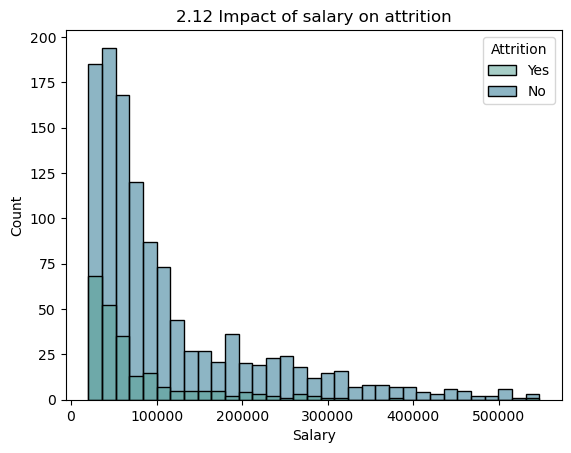

In [72]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.Salary, palette="crest")
plt.title("2.12 Impact of salary on attrition")
plt.show()

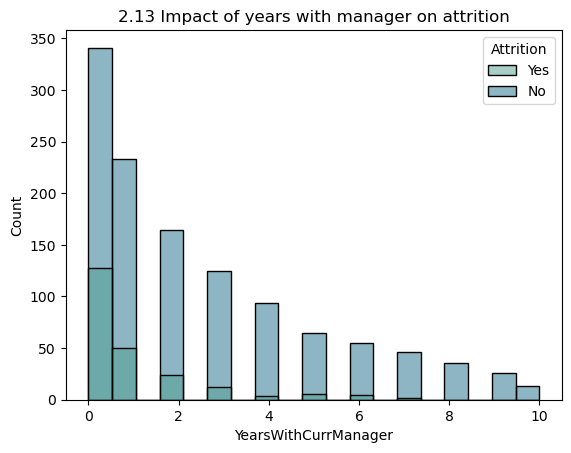

In [73]:
sns.histplot(hue=employee_df.Attrition , x=employee_df.YearsWithCurrManager, palette="crest")
plt.title("2.13 Impact of years with manager on attrition")
plt.show()

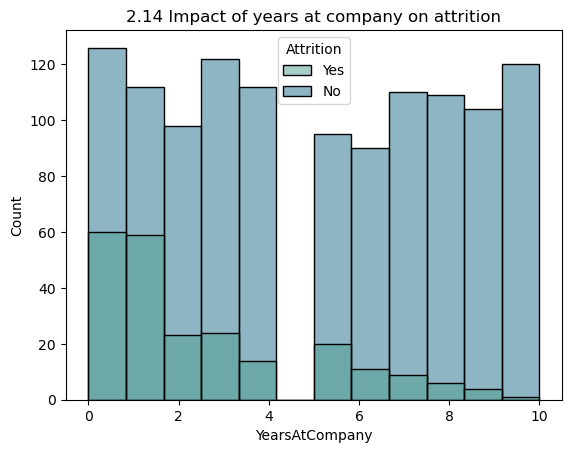

In [74]:
sns.histplot(x=employee_df.YearsAtCompany, hue=employee_df.Attrition , palette="crest")
plt.title("2.14 Impact of years at company on attrition")
plt.show()

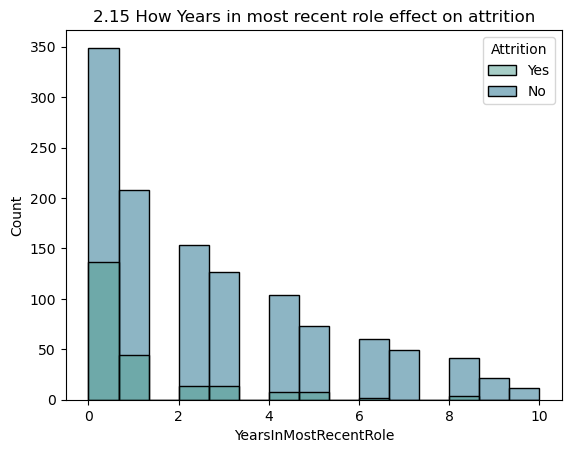

In [75]:
sns.histplot(x=employee_df.YearsInMostRecentRole, hue=employee_df.Attrition , palette="crest")
plt.title("2.15 How Years in most recent role effect on attrition")
plt.show()

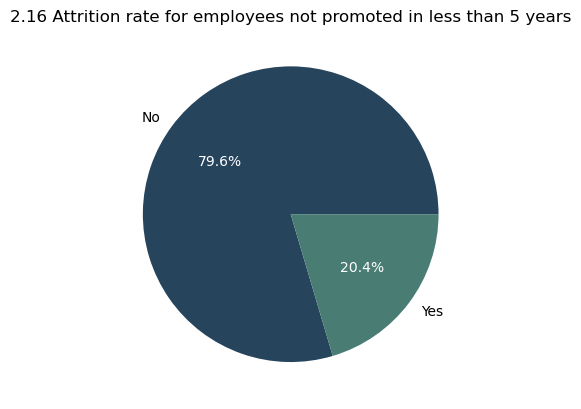

In [76]:
# Calculate promotion stagnation attrition percentages
promotion_stagnation = (
    employee_df[employee_df['YearsSinceLastPromotion'] <= 5]['Attrition']
    .value_counts(normalize=True) * 100
)

# Create pie chart
wedges, texts, autotexts = plt.pie(
    promotion_stagnation,
    labels=promotion_stagnation.index,
    autopct='%1.1f%%',
    colors=['#27445D', '#497D74']
)

# Make the percentage texts white
for autotext in autotexts:
    autotext.set_color('white')

# Set title
plt.title('2.16 Attrition rate for employees not promoted in less than 5 years')
plt.show()


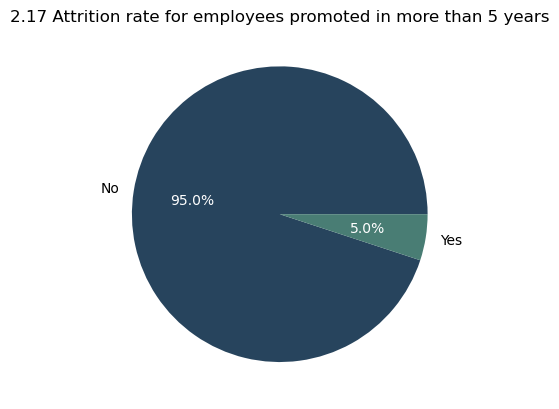

In [77]:
# Calculate attrition percentages for employees promoted after more than 5 years
promotion_stagnation = (
    employee_df[employee_df['YearsSinceLastPromotion'] >= 5]['Attrition']
    .value_counts(normalize=True) * 100
)

# Create pie chart
wedges, texts, autotexts = plt.pie(
    promotion_stagnation,
    labels=promotion_stagnation.index,
    autopct='%1.1f%%',
    colors=['#27445D', '#497D74']
)

# Make percentage numbers white
for autotext in autotexts:
    autotext.set_color('white')

# Title
plt.title('2.17 Attrition rate for employees promoted in more than 5 years')

# Show plot
plt.show()


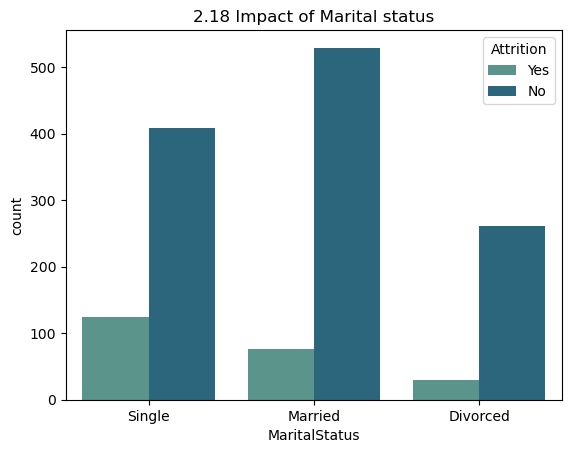

In [78]:
sns.countplot(x=employee_df.MaritalStatus, hue=employee_df.Attrition , palette="crest")
plt.title("2.18 Impact of Marital status")
plt.show()

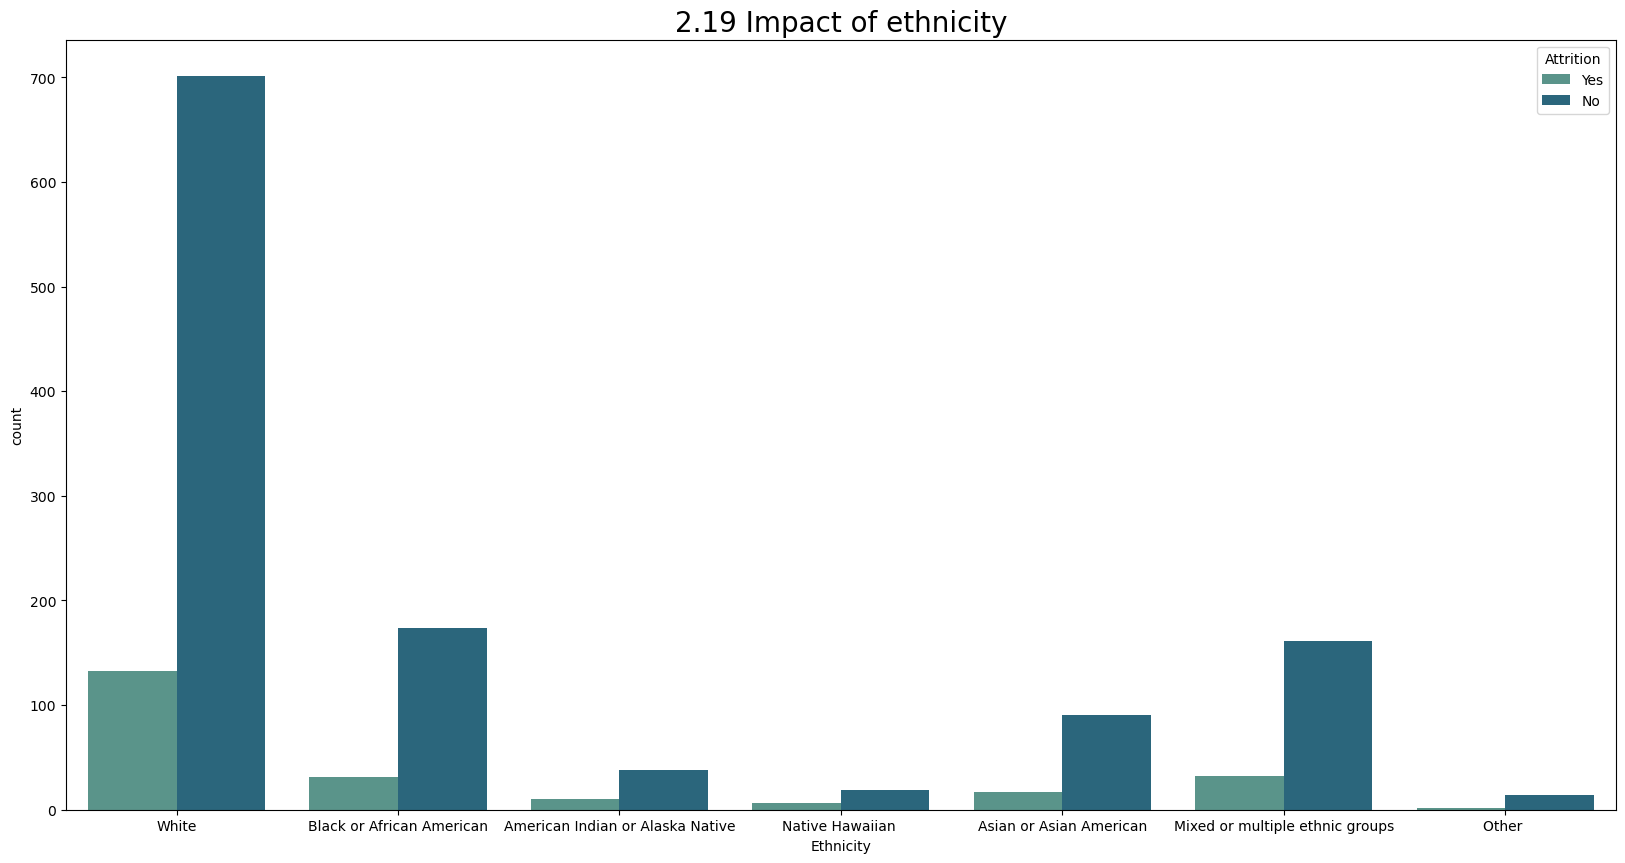

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(x=employee_df.Ethnicity, hue=employee_df.Attrition , palette="crest")
plt.title("2.19 Impact of ethnicity" , fontsize = 20)
plt.show()

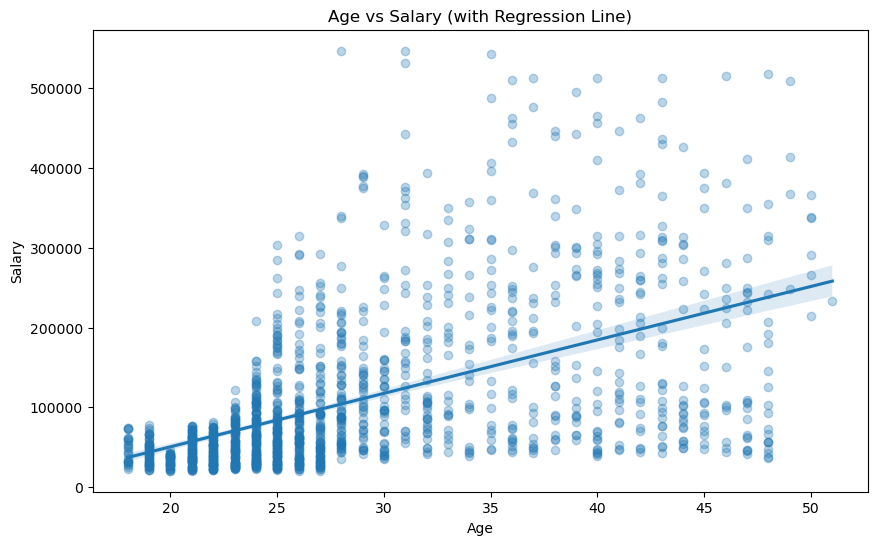

In [80]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Salary', data=employee_df, scatter_kws={'alpha':0.3})
plt.title('Age vs Salary (with Regression Line)')
plt.show()